#### Autores:
Borja, Pablo

Montoya, Gabriel


Se comienza importando la librería y se lee los archivos

In [206]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [99]:
types = {'movieId': 'int', 'title': 'str', 'genres': 'str'}
movies = pd.read_csv("ml-20m/movies.csv", dtype=types)

In [100]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


Se miran los tipos de datos para ver si es necesario parsear el df.

In [101]:
movies.dtypes

movieId     int64
title      object
genres     object
dtype: object

In [204]:
# 
movies['year'] = movies.title.str.slice(-5, -1)

In [104]:
movies['year'] = pd.to_numeric(movies['year'], downcast='integer', errors='coerce')

In [105]:
movies['year'] = movies['year'].astype('Int32', errors='ignore')

In [107]:
discard_movie_id = movies['year'].isna()

In [108]:
movies_discard_index = movies[discard_movie_id]

In [110]:
movies.title[discard_movie_id]

8495                          Babe Ruth Story, The (1948) 
8634                       Heroes of Telemark, The (1965) 
8958                                   Jack's Back (1988) 
9166      From Dusk Till Dawn 2: Texas Blood Money (1999) 
9227                    After the Rain (Ame agaru) (1999) 
9680     Strawberries in the Supermarket (Jagoda u supe...
9773                                  Sister Helen (2002) 
9921                                   Love Letter (1995) 
10037                              Acts of Worship (2001) 
10162    Godzilla vs. Biollante (Gojira vs. Biorante) (...
10226    Godzilla vs. Hedorah (Gojira tai Hedorâ) (Godz...
10593                                            Babylon 5
10846                                  Le créateur (1999) 
11704                      Atlantis: Milo's Return (2003) 
11753                                     R.S.V.P. (2002) 
11870                                 Blood Trails (2006) 
11899    Godzilla vs. Destroyah (Gojira vs. Desutoroiâ).

In [111]:
# Use this as a index for discarded movieId
movies_discard_index.head()

,movieId,title,genres,year
8495,25936,"Babe Ruth Story, The (1948)",Drama,NaN
8634,26137,"Heroes of Telemark, The (1965)",Action|Drama|War,NaN
8958,26628,Jack's Back (1988),Crime|Horror|Mystery|Thriller,NaN
9166,27008,From Dusk Till Dawn 2: Texas Blood Money (1999),Comedy|Crime|Horror,NaN
9227,27189,After the Rain (Ame agaru) (1999),Action|Drama,NaN


In [113]:
movies = movies[~discard_movie_id]

In [115]:
movies['title'] = movies.title.str.slice(0, -7)

In [205]:
movies['title'][:3]

0           Toy Story
1             Jumanji
2    Grumpier Old Men
Name: title, dtype: object

In [117]:
all_genres = set([item for sublist in list(movies.genres.str.split('|')) for item in sublist])

In [118]:
all_genres

{'(no genres listed)',
 'Action',
 'Adventure',
 'Animation',
 'Children',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Fantasy',
 'Film-Noir',
 'Horror',
 'IMAX',
 'Musical',
 'Mystery',
 'Romance',
 'Sci-Fi',
 'Thriller',
 'War',
 'Western'}

In [119]:
movies.genres.str.contains('(no genres listed)').sum()

/home/pborja/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


237

In [120]:
all_genres = [genres for genres in all_genres if genres not in ['(no genres listed)','IMAX'] ]

In [121]:
all_genres

['Children',
 'Thriller',
 'Western',
 'Documentary',
 'Mystery',
 'Film-Noir',
 'Animation',
 'Action',
 'Fantasy',
 'Crime',
 'Comedy',
 'Adventure',
 'Horror',
 'War',
 'Romance',
 'Sci-Fi',
 'Drama',
 'Musical']

In [123]:
for genre in all_genres:
    movies['genre_'+genre] = np.where(( movies.genres.str.contains(genre) | movies.genres.str.contains('no genres') ) , 1 , 0)

In [207]:
movies.head()

,movieId,title,genres,year,genre_Children,genre_Thriller,genre_Western,genre_Documentary,genre_Mystery,genre_Film-Noir,...,genre_Fantasy,genre_Crime,genre_Comedy,genre_Adventure,genre_Horror,genre_War,genre_Romance,genre_Sci-Fi,genre_Drama,genre_Musical
0,1,Toy Story,None,Stor,1,0,0,0,0,0,...,1,0,1,1,0,0,0,0,0,0
1,2,Jumanji,None,manj,1,0,0,0,0,0,...,1,0,0,1,0,0,0,0,0,0
2,3,Grumpier Old Men,None,d Me,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,0
3,4,Waiting to Exhale,None,xhal,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,1,0
4,5,Father of the Bride Part II,None,rt I,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [125]:
movies['genres'] = None

In [149]:
movies['year'] = movies['year'].astype('int')

In [157]:
bins = movies['year'].unique().max() - movies['year'].unique().min()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f2b5e621f28>]],
      dtype=object)

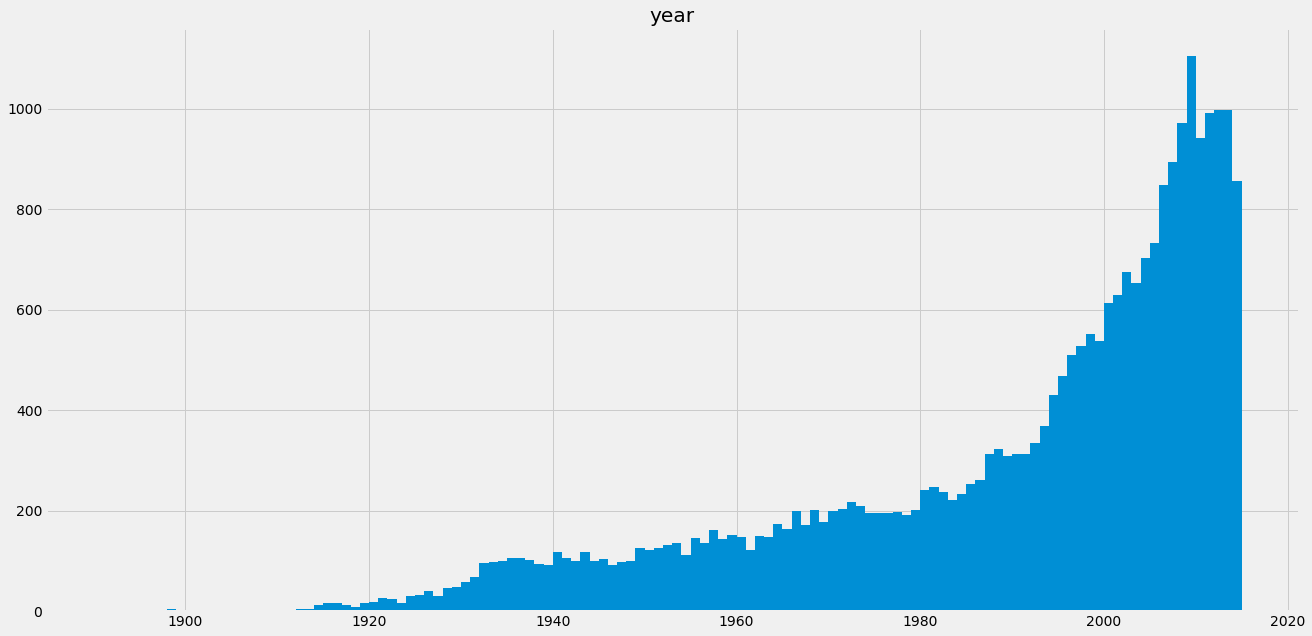

In [194]:
plt.style.use('fivethirtyeight')
movies.hist(column='year', bins=bins, figsize=(20, 10))

In [160]:
# Calculate the cumsum by row
df_genres_sum = movies.iloc[:, 4:]

In [174]:
genres_cumsum = df_genres_sum.sum()

In [180]:
genre_dist_df = pd.DataFrame({'genre': df_genres_sum.columns,
                             'count': genres_cumsum})\
                            .reset_index()\
                            .drop('index', axis=1)

In [181]:
genre_dist_df

,genre,count
0,genre_Children,1373
1,genre_Thriller,4368
2,genre_Western,910
3,genre_Documentary,2654
4,genre_Mystery,1741
5,genre_Film-Noir,565
6,genre_Animation,1255
7,genre_Action,3728
8,genre_Fantasy,1640
9,genre_Crime,3157


In [185]:
genre_dist_df.sort_values(by='count', axis=0, ascending=False, inplace=True)

In [ ]:
ax.barh(y_pos, performance, xerr=error, align='center')
ax.set_yticks(y_pos)
ax.set_yticklabels(people)
ax.invert_yaxis()  # labels read top-to-bottom
ax.set_xlabel('Performance')
ax.set_title('How fast do you want to go today?')

Text(0.5, 1.0, 'Genre Distribution')

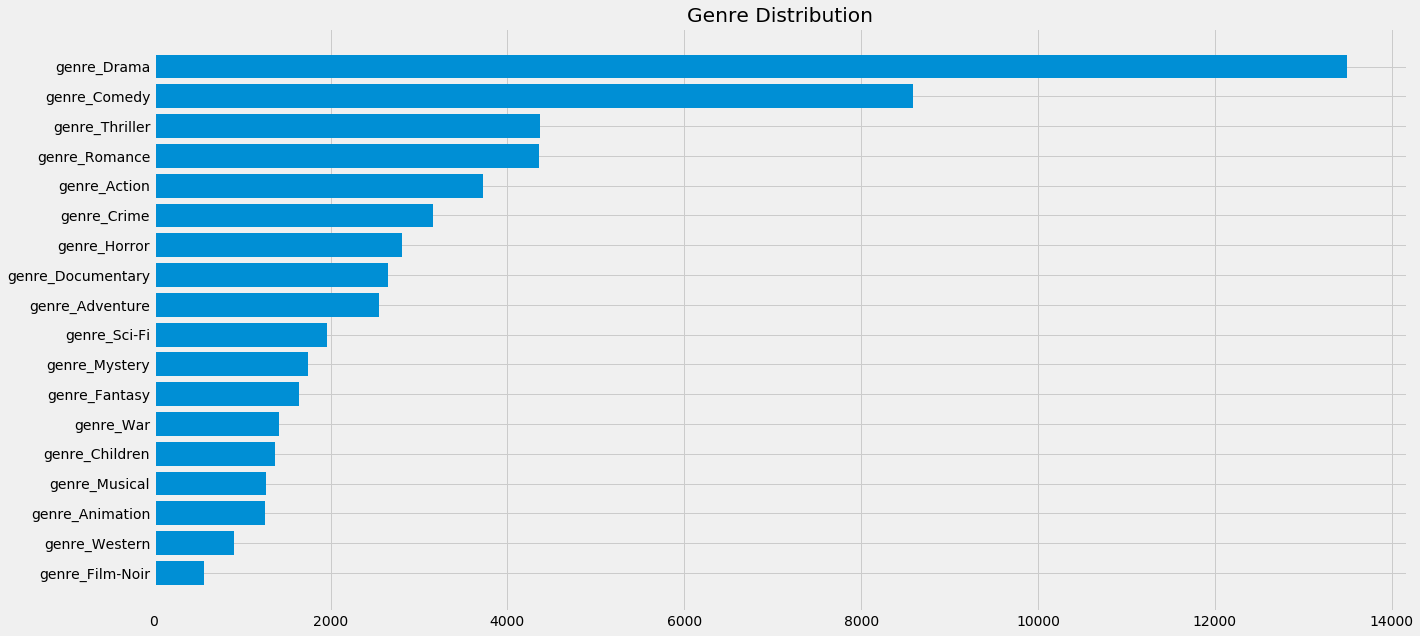

In [193]:
plt.style.use('fivethirtyeight')

fig, ax = plt.subplots(figsize=(20,10))

ax.barh(genre_dist_df['genre'], genre_dist_df['count'])
ax.set_yticklabels(genre_dist_df['genre'])
ax.invert_yaxis()
ax.set_title('Genre Distribution')


In [192]:
plt.style.available

['classic',
 'seaborn-dark-palette',
 'seaborn-colorblind',
 '_classic_test',
 'seaborn-deep',
 'seaborn-poster',
 'seaborn-white',
 'fast',
 'bmh',
 'seaborn-darkgrid',
 'fivethirtyeight',
 'seaborn-bright',
 'seaborn-paper',
 'seaborn-dark',
 'Solarize_Light2',
 'grayscale',
 'seaborn-talk',
 'ggplot',
 'tableau-colorblind10',
 'seaborn-ticks',
 'seaborn-notebook',
 'seaborn-whitegrid',
 'seaborn-pastel',
 'seaborn-muted',
 'seaborn',
 'dark_background']

In [32]:
types = {'userId': 'int', 'movieId': 'int', 'rating': None, 'timestamp': None}
ratings = pd.read_csv("ml-20m/ratings.csv",usecols=['userId', 'movieId'], dtype=types)

In [33]:
ratings.head()

,userId,movieId
0,1,2
1,1,29
2,1,32
3,1,47
4,1,50


In [34]:
ratings = ratings[~ratings.movieId.isin(movies_discard_index.movieId)]

In [35]:
ratings.shape[0]

19999041

In [41]:
ratings_np = ratings.values

In [42]:
import numpy as np
from itertools import combinations, groupby
from collections import Counter

In [43]:
transactions=[]#requiere que la base esté ordenada por compra
for ratings_np_iuserId, ratings_np_movieId in groupby(ratings_np, lambda x: x[0]):
    transactions.append([item[1] for item in ratings_np_movieId])

In [47]:
# Installing the apriory package if it's not installed.
! pip install efficient-apriori

In [196]:
from efficient_apriori import apriori

itemsets, rules = apriori(transactions, min_support=0.09,  min_confidence=0.7, max_length=2)#min_sup conf entre 0 y 1
print(itemsets)
print(rules)
rules=sorted(rules, key=lambda rule: rule.confidence)
for rule in rules:
  print(rule) # Prints the rule and its confidence, support, lift, ...

{1: {(1,): 49695, (2,): 22243, (3,): 12735, (6,): 23899, (7,): 12961, (10,): 29005, (11,): 18162, (16,): 17394, (17,): 20667, (19,): 20938, (21,): 24116, (25,): 21553, (32,): 44980, (34,): 32255, (36,): 20809, (39,): 26254, (47,): 43249, (48,): 13046, (50,): 47006, (62,): 19381, (70,): 12712, (95,): 22104, (104,): 17915, (110,): 53769, (111,): 24481, (141,): 22020, (150,): 47777, (151,): 12616, (153,): 32867, (158,): 12625, (160,): 14965, (161,): 23628, (163,): 14321, (165,): 33940, (172,): 12706, (173,): 14993, (185,): 24618, (196,): 13628, (208,): 27775, (223,): 23695, (225,): 12662, (231,): 32085, (235,): 16419, (253,): 27568, (260,): 54502, (266,): 16171, (288,): 23610, (292,): 26246, (293,): 25804, (296,): 67310, (300,): 20601, (316,): 31799, (317,): 16183, (318,): 63366, (329,): 26404, (337,): 17881, (339,): 23214, (344,): 38226, (349,): 29571, (350,): 15833, (353,): 16524, (356,): 66172, (357,): 27699, (364,): 38991, (367,): 34384, (368,): 17062, (370,): 14261, (377,): 41562, (3

In [73]:
rules_list = []

for r in rules:
    rules_list.append([r.lhs[0], r.rhs[0], r.confidence, r.support, r.lift, r.conviction])

In [75]:
df_rules = pd.DataFrame(rules_list, 
                        columns=['lhs_movie', 'rhs_movie', 'confidence', 'support', 'lift', 'conviction'])

In [80]:
df_rules.head()

,lhs_movie,rhs_movie,confidence,support,lift,conviction
0,1517,296,0.700009,0.111572,1.440296,1.713327
1,4027,318,0.700139,0.098373,1.530226,1.809039
2,1240,356,0.700200,0.169012,1.465467,1.741829
3,1573,110,0.700217,0.093333,1.803551,2.040662
4,1291,589,0.700320,0.158174,1.856469,2.078108


In [84]:
rules_joined = pd.merge(df_rules, movies, how='left', left_on='lhs_movie', right_on='movieId')

In [86]:
rules_joined.rename(columns={'title': 'left_title'}, inplace=True)

In [87]:
rules_joined = pd.merge(rules_joined, movies, how='left', left_on='rhs_movie', right_on='movieId')

In [88]:
rules_joined.rename(columns={'title': 'right_title'}, inplace=True)

In [91]:
rules_joined = rules_joined[['left_title', 'right_title', 'confidence', 'support', 'lift', 'conviction']]

In [93]:
rules_joined.head()

,left_title,right_title,confidence,support,lift,conviction
0,Austin Powers: International Man of Mystery,Pulp Fiction,0.700009,0.111572,1.440296,1.713327
1,"O Brother, Where Art Thou?","Shawshank Redemption, The",0.700139,0.098373,1.530226,1.809039
2,"Terminator, The",Forrest Gump,0.700200,0.169012,1.465467,1.741829
3,Face/Off,Braveheart,0.700217,0.093333,1.803551,2.040662
4,Indiana Jones and the Last Crusade,Terminator 2: Judgment Day,0.700320,0.158174,1.856469,2.078108


In [203]:
rules_joined.sort_values('support', ascending=False)[:50]

,left_title,right_title,confidence,support,lift,conviction
135,Pulp Fiction,"Silence of the Lambs, The",0.708855,0.344516,1.550915,1.864856
649,"Silence of the Lambs, The",Pulp Fiction,0.753772,0.344516,1.550915,2.087424
873,Jurassic Park,Forrest Gump,0.781278,0.336869,1.635155,2.387501
72,Forrest Gump,Jurassic Park,0.705041,0.336869,1.635155,1.928484
56,Forrest Gump,Pulp Fiction,0.703409,0.336089,1.447293,1.732970
324,"Shawshank Redemption, The",Pulp Fiction,0.722312,0.330486,1.486185,1.850933
11,"Silence of the Lambs, The",Forrest Gump,0.700864,0.320334,1.466856,1.745694
923,Terminator 2: Judgment Day,Jurassic Park,0.790636,0.298253,1.833670,2.716912
517,Braveheart,Forrest Gump,0.740520,0.287502,1.549852,2.012482
1079,Star Wars: Episode VI - Return of the Jedi,Star Wars: Episode IV - A New Hope,0.837422,0.283220,2.127941,3.730290


In [201]:
rules_joined.sort_values('confidence', ascending=False)[:50]

,left_title,right_title,confidence,support,lift,conviction
1143,"Matrix Reloaded, The","Matrix, The",0.921308,0.113110,2.485579,7.997493
1142,"Godfather: Part II, The","Godfather, The",0.914629,0.180941,3.062984,8.215802
1141,Shrek 2,Shrek,0.903804,0.095045,3.915004,7.995579
1140,Kill Bill: Vol. 2,Kill Bill: Vol. 1,0.897024,0.121017,5.712847,8.186206
1139,"Lord of the Rings: The Return of the King, The","Lord of the Rings: The Fellowship of the Ring,...",0.890490,0.203036,3.284068,6.655510
1138,In the Line of Fire,"Fugitive, The",0.886866,0.120620,2.477253,5.674633
1137,"Lord of the Rings: The Two Towers, The","Lord of the Rings: The Fellowship of the Ring,...",0.886765,0.217361,3.270330,6.436555
1136,Batman Forever,Batman,0.883044,0.209563,2.655478,5.706950
1135,Natural Born Killers,Pulp Fiction,0.882423,0.150434,1.815620,4.371445
1134,Mrs. Doubtfire,Forrest Gump,0.880583,0.218675,1.842993,4.372898


In [202]:
rules_joined.sort_values('lift', ascending=False)[:50]

,left_title,right_title,confidence,support,lift,conviction
1140,Kill Bill: Vol. 2,Kill Bill: Vol. 1,0.897024,0.121017,5.712847,8.186206
798,Kill Bill: Vol. 1,Kill Bill: Vol. 2,0.770716,0.121017,5.712847,3.773017
193,Back to the Future Part II,Back to the Future Part III,0.712743,0.100077,5.004559,2.985414
46,Back to the Future Part III,Back to the Future Part II,0.702697,0.100077,5.004559,2.891290
1060,Spider-Man 2,Spider-Man,0.831403,0.094322,4.919820,4.928962
399,"Incredibles, The",Finding Nemo,0.728909,0.104684,4.283117,3.061032
1053,X2: X-Men United,X-Men,0.828228,0.093131,4.272660,4.693186
41,Catch Me If You Can,Ocean's Eleven,0.702589,0.091326,4.093719,2.785280
1141,Shrek 2,Shrek,0.903804,0.095045,3.915004,7.995579
1030,Star Wars: Episode II - Attack of the Clones,Star Wars: Episode I - The Phantom Menace,0.818265,0.097045,3.831878,4.327498


#### Informe de TP No Supervisado
Parámetros usados min_support=0.09,  min_confidence=0.7, max_length=2

* Ordenamiento según Support

En este caso lo que estoy viendo usando esta métrica es la cantidad de veces que aparece esta regla.
Como se ve en ordenamiento este tipo de métricas coloca en una posición superior a las palículas más taquilleras que quizás para nuestro estudio no sea tan relevante. Entonces podemos usar otra métrica.
Como acotación es probable que el valor de soporte mínimo es muy alto para hacer un análisis más fino, se utilizó ese paramétro porque es el que anduvo en la laptop sin tildarse :).

* Ordenamiento según Confidence

Esta métrica usa la probabilidad condicional para ordenar las reglas y de lo que se puede ver en el ordenamiento es que figuran muchas películas que fueron muy populares, por lo que no hay una clara distinción si esa probabilidad es alta porque figuran en muchas reglas al ser taquilleras o hay alguna relación interesante dentro de ello.

* Ordenamiento según Lift

En Este caso lo que me interesa es que las reglas que encuentro no sea fruto de la casualidad.
Se puede observar que, descartando las fraquicias, hay películas que pertenecen a una misma productora o tiene en común el género. Como por ejemplo The Incredibles y Finding Nemo o Batamn Begins y Lord of The Rings que son Sci-Fi. Por lo que es interesante seguir indagando por esa línea.

Comentarios Adicionales:

En los resultados del ordenamiento según las métricas se pueden observar varias películas que tienen como consecuente una secuela o precuela de la película antecedente.
Lo que se debería haber hecho para limpiar los resultados es eliminar las reglas que tengan involucradas películas de una misma franquicia (Como está hecho en el Informe original), pero por falta de tiempo no se llegó a implementar esa parte.